# TUTORIAL 05:
## Simple Linear Regression dengan Scikit-Learn

Simple linear regression **memodelkan hubungan antara sebuah response variable dengan sebuah explanatory variable sebagai suatu garis lurus**(linear) 

In [3]:
import pandas as pd 

Sebagai contoh, kita mempunyai sebuah data pizza yang memiliki 2 key yaitu diameter dan harga. Kita mencoba memasukan features tersebut dengan menggunakan **dictionary** pada python dan merubahnya dalam bentuk **data frame** seperti dibawah ini: 

In [4]:
pizza = {'diameter' : [6, 8, 10, 14, 18], 
         'harga'    : [7, 9, 13, 17.5, 18]}

pizza_df = pd.DataFrame(pizza)
pizza_df

,diameter,harga
0,6,7.0
1,8,9.0
2,10,13.0
3,14,17.5
4,18,18.0


Disini kita mencoba untuk membuat model **machine learning** sederhana, dimana kita memerintahkan mesin tersebut untuk **menerka harga pizza berdasarkan diameternya**. Dengan kata lain, **diameter akan berperan sebagai features, sedangkan harga berperan sebagai target**. 

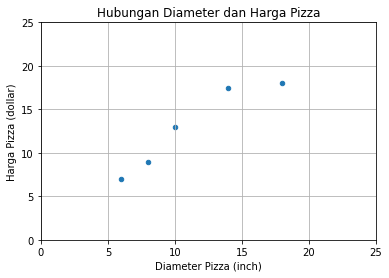

In [19]:
import matplotlib.pyplot as plt 

pizza_df.plot(kind='scatter', x ='diameter', y='harga')

plt.title('Hubungan Diameter dan Harga Pizza')
plt.xlabel('Diameter Pizza (inch)')
plt.ylabel('Harga Pizza (dollar)')
plt.xlim(0,25)
plt.ylim(0,25)
plt.grid(True)
plt.show()

### Simple Linear Regression Model
Digunakan untuk menyelesaikan regression task. 

In [10]:
import numpy as np 

x = np.array(pizza_df['diameter'])       # Variable feature
y = np.array(pizza_df['harga'])          # Variable target 

print(f'x: {x}')
print(f'y: {y}')

x: [ 6  8 10 14 18]
y: [ 7.   9.  13.  17.5 18. ]


Nilai **variable x dan y yang telah dibuat hanya berdimensi satu**, namun **sk-learn method membutuhkan dua dimensi** sehingga kita perlu **mereshape variable** feature dan variable target yang telah dibuat

In [13]:
x = x.reshape(-1,1)
x.shape

(5, 1)

### Training Simple Linear Regression Model

Untuk melakukan training dengan menggunakan metode Linear Regression, kita perlu mengimport methods tersebut dari sk.learn. Selanjutnya digunakan method .fit(x,y) dimana x merujuk pada variable features 2 dimensi sedangkan y adalah variable target. 

In [14]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x,y)

LinearRegression()

### Visualisasi Simple Linear Regression Model

**Formula Linear Regrresion adalah y = a + bx**, dimana: 
- y = Response Variable 
- x = Eplanatory Variable
- a = Intercept             # Nilai y ketika x sama dengan 0
- b = Slope                 # Kemiringan garis

In [29]:
x_vis = np.array([0, 25]).reshape(-1,1) 
y_vis = model.predict(x_vis)

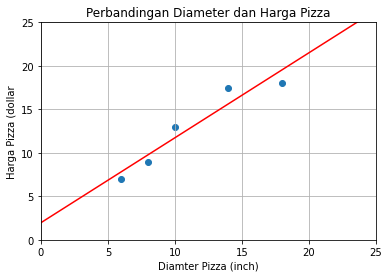

intercept: 1.965517241379315
slope: [0.9762931]


In [31]:
plt.scatter(x,y)                  # Plotting marker berwarna biru
plt.plot(x_vis, y_vis, '-r')      # Plotting garis regresi berwarna merah, dimana kita mempunyai dua nilai x yaitu 0 dan 25

plt.title('Perbandingan Diameter dan Harga Pizza')
plt.xlabel('Diamter Pizza (inch)')
plt.ylabel('Harga Pizza (dollar')
plt.xlim(0,25)
plt.ylim(0,25)
plt.grid(True)
plt.show()

print(f'intercept: {model.intercept_}') # Method .intercept_ digunakan untuk memunculkan nilai intercept dari linear regression
print(f'slope: {model.coef_}')          # Method .coef_ digunakan untuk memunculkan nilai gradien atau slope dari linear regression

### Mencari Nilai Slope 
Untuk pembuktian nilai slope yang diperoleh dengan menggunakan method .coef_ , **Nilai slope pada Linear Regression** dapat diperoleh dengan memanfaatkan formula berikut: 
<br>b = cov(x,y) / var(x)

dimana **cov(x,y) merujuk pada covariance** sedangkan **var(x) merujuk pada variance**.

In [35]:
print(f'x: {x}')                   # Features variable 2 dimensi 
print(f'x flatten: {x.flatten()}') # Method .flatten() digunakan untuk merubah variable features 2 dimensi menjadi 1 dimensi
print(f'y: {y}')                   # Target variable 1 dimensi

x: [[ 6]
 [ 8]
 [10]
 [14]
 [18]]
x flatten: [ 6  8 10 14 18]
y: [ 7.   9.  13.  17.5 18. ]


#### Variance 

In [36]:
variance_x = np.var(x.flatten(), ddof=1) # DDOF merujuk pada Degree of Freedom
print(f'variance = {variance_x}')

variance = 23.2


#### Covariance

In [37]:
np.cov(x.flatten(), y) # Penggunaan method .cov(x,y) membutuhkan 2 parameter, yaitu x (variable features) dan y (variable target) yang berdimensi satu

array([[23.2 , 22.65],
       [22.65, 24.3 ]])

In [42]:
covariance_xy = np.cov(x.flatten(), y)[0][1] # Kita hanya membutuhkan nilai diagonalnya saja (22.65) sehingga kita menslice covariance tersebut.
print(f'{covariance_xy}')

22.650000000000002


#### Slope

In [43]:
slope = covariance_xy / variance_x
print(f'{slope}')

0.976293103448276


### Mencari Nilai Intercept 
Untuk pembuktian nilai intercept yang diperoleh dengan menggunakan method .intercept_ , **Nilai intercept pada Linear Regression** dapat diperoleh dengan memanfaatkan formula berikut: 
<br>a = y - bx

dimana **a merujuk pada nilai intercept, y merujuk pada nilai rerata dari y, dan x merujuk pada nilai rerata dari x**. 

In [47]:
intercept = np.mean(y) - slope * np.mean(x)
print(f'intercept: {intercept}')

intercept: 1.9655172413793096


### Prediksi Harga Pizza

In [49]:
diameter_pizza = np.array([12,20,23]).reshape(-1,1)   # Kita mencoba untuk memprediksi harga pizza dari contoh berikut, dan di reshape 
diameter_pizza

array([[12],
       [20],
       [23]])

In [50]:
prediksi_harga = model.predict(diameter_pizza)
prediksi_harga

array([13.68103448, 21.49137931, 24.42025862])

In [52]:
for dmtr, hrg in zip(diameter_pizza, prediksi_harga): # Menampilkan prediksi harga dari contoh data diameter pizza dengan menggunakan for loop
    print(f'Diameter: {dmtr} prediksi harga: {hrg}')

Diameter: [12] prediksi harga: 13.681034482758621
Diameter: [20] prediksi harga: 21.491379310344826
Diameter: [23] prediksi harga: 24.42025862068965


### Evaluasi Simple Linear Regression Model

### Training & Testing Dataset

In [53]:
x_train = np.array([6,8,10,14,18]).reshape(-1,1) # Training set
y_train = np.array([7,9,13,17.5,18])             # Training set

x_test = np.array([8,9,11,16,12]).reshape(-1,1)  # Test set
y_test = np.array([11, 8.5, 15, 18, 11])         # Test set

### Training Simple Linear Regression Model

In [54]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

### Evaluasi Linear Regression Model dengan Coefficient of Determination atau R-Squared (R2)

In [55]:
from sklearn.metrics import r2_score

y_pred = model.predict(x_test)
r_squared = r2_score(y_test, y_pred)  # Method r2_score membutuhkan 2 parameter yaitu y_test dan y_pred

print(f'R-Squared: {r_squared}')      # Nilai R-Squared yang didapat adalah 0.66, jika nilai mendekati 1 maka model tersebut dianggap cukup baik

R-Squared: 0.6620052929422553
